In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 400
import math
import numpy as np
from scipy import stats as st


In [2]:
calls = pd.read_csv('/datasets/calls.csv', sep=',')
internet = pd.read_csv('/datasets/internet.csv', sep=',')
messages = pd.read_csv('/datasets/messages.csv', sep=',')
tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
users = pd.read_csv('/datasets/users.csv', sep=',')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Поставновка задачи.

Посчитайте для каждого пользователя:

-количество сделанных звонков и израсходованных минут разговора по месяцам;

-количество отправленных сообщений по месяцам;

-объем израсходованного интернет-трафика по месяцам;

-помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

-средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:

-как вы формулировали нулевую и альтернативную гипотезы;

-какой критерий использовали для проверки гипотез и почему.



В первую очередь просмотрим датафреймы и определим какие столбцы нам нужны для анализа,  чтобы не делать лишнюю работу.


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Имя, возраст и фамилия и когда закончился тариф не нужны. как я понял в процессе работы, дата начала тоже не сильно нужна.

In [9]:
users_fin = users[['user_id', 'city', 'tariff']]

In [10]:
#users_fin['reg_date'] = pd.to_datetime(users_fin['reg_date'],
#                                              format='%Y-%m-%d')

In [11]:
#users_fin.info()

In [12]:
#users_fin.columns

In [13]:
#users_fin = users_fin[users_fin['churn_date'].isna() == True].reset_index()

In [14]:
#users_fin = users_fin.drop('churn_date', axis=1)

In [15]:
#users_fin.info()

In [16]:
#users_fin.head()

In [17]:
users_fin['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Пропусков и ошибок нет

In [18]:
users_fin['city'].value_counts()

Москва              99
Санкт-Петербург     39
Новосибирск         16
Казань              14
Омск                14
Уфа                 12
Краснодар           11
Ульяновск           11
Набережные Челны    11
Екатеринбург        11
Челябинск            9
Самара               9
Волгоград            8
Пермь                8
Нижний Новгород      8
Красноярск           7
Новокузнецк          7
Улан-Удэ             7
Вологда              7
Ростов-на-Дону       6
Сочи                 6
Воронеж              6
Киров                6
Пенза                6
Томск                6
Иркутск              6
Тюмень               6
Балашиха             5
Магнитогорск         5
Махачкала            5
Ставрополь           5
Владивосток          5
Новороссийск         4
Хабаровск            4
Мурманск             4
Астрахань            4
Рязань               4
Петрозаводск         4
Тольятти             4
Саранск              4
Калуга               4
Кострома             4
Чита                 4
Брянск     

Нам нужна Москва и все остальные. Поделим всех на 2 части, Москва и Другие

In [19]:
users_fin.loc[users_fin['city'] != 'Москва', 'city'] = 'Другое'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
users_fin['city'].value_counts()

Другое    401
Москва     99
Name: city, dtype: int64

In [21]:
users_fin.head()

,user_id,city,tariff
0,1000,Другое,ultra
1,1001,Москва,smart
2,1002,Другое,smart
3,1003,Москва,ultra
4,1004,Другое,ultra


С этой закончили, перейдем к следующим.

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [23]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'],
                                              format='%Y-%m-%d')

айди самого звонка не нужен.

In [25]:
calls_fin = calls.drop('id', axis=1)

In [26]:
calls_fin

,call_date,duration,user_id
0,2018-07-25,0.00,1000
1,2018-08-17,0.00,1000
2,2018-06-11,2.85,1000
3,2018-09-21,13.80,1000
4,2018-12-15,5.18,1000
...,...,...,...
202602,2018-12-26,0.76,1499
202603,2018-10-18,18.83,1499
202604,2018-11-10,10.81,1499
202605,2018-10-06,4.27,1499


In [27]:
calls_fin['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [28]:
calls_fin[calls_fin['duration'] == 0].count()

call_date    39613
duration     39613
user_id      39613
dtype: int64

In [29]:
calls_fin['duration'] = calls_fin['duration'].apply(np.ceil)

In [30]:
calls_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 MB


39613 звонков с 0 длительностью. Я предполагаю, что это недозвоны таким образом отображаются, либо сбросы до 5 сек(раньше были такие звонки: которые не тарифицировались). Просто удаляем такие звонки.

прочитал в замечаниях в слаке, что нужно округлить до 1 минуты, исправляю

In [31]:
calls_fin.loc[calls_fin['duration'] == 0, 'duration'] = 1.0

In [32]:
calls_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 MB


In [33]:
calls_fin.head()

,call_date,duration,user_id
0,2018-07-25,1.0,1000
1,2018-08-17,1.0,1000
2,2018-06-11,3.0,1000
3,2018-09-21,14.0,1000
4,2018-12-15,6.0,1000


In [34]:
calls_fin['month'] = pd.DatetimeIndex(calls_fin['call_date']).month

In [35]:
calls_fin['duration'] = calls_fin['duration'].astype(int)

In [36]:
calls_fin.head()

,call_date,duration,user_id,month
0,2018-07-25,1,1000,7
1,2018-08-17,1,1000,8
2,2018-06-11,3,1000,6
3,2018-09-21,14,1000,9
4,2018-12-15,6,1000,12


In [37]:
calls_fin_group = calls_fin.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])

In [38]:
calls_fin_group.head()

count  sum
user_id month            
1000    5         22  164
        6         43  187
        7         47  346
        8         52  418
        9         58  478

In [39]:
calls_fin_group = calls_fin_group.reset_index(level = 'month')

In [40]:
calls_fin_group.columns = ['month', 'count_calls', 'sum_calls']

In [41]:
calls_fin_group

,month,count_calls,sum_calls
user_id,,,
1000,5,22,164
1000,6,43,187
1000,7,47,346
1000,8,52,418
1000,9,58,478
...,...,...,...
1498,10,41,258
1499,9,9,71
1499,10,68,473


следующая таблица

In [42]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [43]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

id и unnamed дропаем,дату преобразовываем в дататайм

In [44]:
internet = internet.drop(['Unnamed: 0', 'id'], axis=1)

In [45]:
internet['session_date'] = pd.to_datetime(internet['session_date'],
                                              format='%Y-%m-%d')

In [46]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 3 columns):
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.4 MB


In [47]:
internet.head()

,mb_used,session_date,user_id
0,112.95,2018-11-25,1000
1,1052.81,2018-09-07,1000
2,1197.26,2018-06-25,1000
3,550.27,2018-08-22,1000
4,302.56,2018-09-24,1000


In [48]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [49]:
internet_group = internet.groupby(['user_id', 'month'])['mb_used'].sum()

In [50]:
internet_group.head()

user_id  month
1000     5         2253.49
         6        23233.77
         7        14003.64
         8        14055.93
         9        14568.91
Name: mb_used, dtype: float64

In [51]:
internet_group = internet_group.reset_index(level = 'month')

In [52]:
internet_group.head()

,month,mb_used
user_id,,
1000,5,2253.49
1000,6,23233.77
1000,7,14003.64
1000,8,14055.93
1000,9,14568.91


In [53]:
internet_group['gb_used'] = internet_group['mb_used'] / 1024

In [54]:
internet_group

,month,mb_used,gb_used
user_id,,,
1000,5,2253.49,2.200674
1000,6,23233.77,22.689229
1000,7,14003.64,13.675430
1000,8,14055.93,13.726494
1000,9,14568.91,14.227451
...,...,...,...
1498,10,20579.36,20.097031
1499,9,1845.75,1.802490
1499,10,17788.51,17.371592


In [55]:
internet_group['gb_used'] = internet_group['gb_used'].apply(np.ceil)

In [56]:
internet_group['gb_used'] = internet_group['gb_used'].astype(int)

In [57]:
internet_group.head()

,month,mb_used,gb_used
user_id,,,
1000,5,2253.49,3
1000,6,23233.77,23
1000,7,14003.64,14
1000,8,14055.93,14
1000,9,14568.91,15


Следующая таблица

In [58]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [59]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id убираем, дату преобразовываем, группируем по юзерайди высчитываем месяц сообщения и считаем кол-во в месяц.

In [60]:
messages = messages.drop('id', axis=1)

In [61]:
messages['message_date'] = pd.to_datetime(messages['message_date'],
                                              format='%Y-%m-%d')

In [62]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [63]:
messages['year'] = pd.DatetimeIndex(messages['message_date']).year

In [64]:
messages.head()

,message_date,user_id,month,year
0,2018-06-27,1000,6,2018
1,2018-10-08,1000,10,2018
2,2018-08-04,1000,8,2018
3,2018-06-16,1000,6,2018
4,2018-12-05,1000,12,2018


In [65]:
messages['year'].nunique()

1

Всего 1 год у нас, поэтому столбцом год можно пренебречь, и в будущих таблицах тоже.

In [66]:
messages = messages.drop('year', axis=1)

In [67]:
messages_group = messages.groupby(['user_id', 'month']).agg('count')

In [68]:
messages_group

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

In [69]:
messages_group = messages_group.reset_index(level = 'month')

In [70]:
messages_group.columns = ['month', 'mes_count']

In [71]:
messages_group

,month,mes_count
user_id,,
1000,5,22
1000,6,60
1000,7,75
1000,8,81
1000,9,57
...,...,...
1498,10,42
1499,9,11
1499,10,48


In [72]:
users_final = users_fin.merge(calls_fin_group, on='user_id')

In [73]:
users_final = users_final.merge(internet_group, on=['user_id', 'month'])

In [74]:
users_final = users_final.merge(messages_group, on=['user_id', 'month'])

In [75]:
users_final

,user_id,city,tariff,month,count_calls,sum_calls,mb_used,gb_used,mes_count
0,1000,Другое,ultra,5,22,164,2253.49,3,22
1,1000,Другое,ultra,6,43,187,23233.77,23,60
2,1000,Другое,ultra,7,47,346,14003.64,14,75
3,1000,Другое,ultra,8,52,418,14055.93,14,81
4,1000,Другое,ultra,9,58,478,14568.91,15,57
...,...,...,...,...,...,...,...,...,...
2662,1498,Другое,smart,10,41,258,20579.36,21,42
2663,1499,Другое,smart,9,9,71,1845.75,2,11
2664,1499,Другое,smart,10,68,473,17788.51,18,48
2665,1499,Другое,smart,11,74,624,17963.31,18,59


In [76]:
users_final.head(20)

,user_id,city,tariff,month,count_calls,sum_calls,mb_used,gb_used,mes_count
0,1000,Другое,ultra,5,22,164,2253.49,3,22
1,1000,Другое,ultra,6,43,187,23233.77,23,60
2,1000,Другое,ultra,7,47,346,14003.64,14,75
3,1000,Другое,ultra,8,52,418,14055.93,14,81
4,1000,Другое,ultra,9,58,478,14568.91,15,57
5,1000,Другое,ultra,10,57,363,14702.49,15,73
6,1000,Другое,ultra,11,43,344,14756.47,15,58
7,1000,Другое,ultra,12,46,341,9817.61,10,70
8,1002,Другое,smart,6,15,118,10856.82,11,4
9,1002,Другое,smart,7,26,219,17580.10,18,11


In [77]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [78]:
tariffs.columns = ['mes_incl', 'mb_per_month_incl', 'min_incl',
       'rub_month_fee', 'rub_per_gb', 'rub_per_mes', 'rub_per_min',
       'tariff']

In [79]:
users_final = users_final.merge(tariffs, on=['tariff'])

In [80]:
users_final['gb_per_month_incl'] = users_final['mb_per_month_incl'] / 1024

In [81]:
users_final['gb_per_month_incl'] = users_final['gb_per_month_incl'].astype(int)

In [82]:
users_final = users_final.drop(['mb_used', 'mb_per_month_incl'], axis=1)

In [83]:
users_final

,user_id,city,tariff,month,count_calls,sum_calls,gb_used,mes_count,mes_incl,min_incl,rub_month_fee,rub_per_gb,rub_per_mes,rub_per_min,gb_per_month_incl
0,1000,Другое,ultra,5,22,164,3,22,1000,3000,1950,150,1,1,30
1,1000,Другое,ultra,6,43,187,23,60,1000,3000,1950,150,1,1,30
2,1000,Другое,ultra,7,47,346,14,75,1000,3000,1950,150,1,1,30
3,1000,Другое,ultra,8,52,418,14,81,1000,3000,1950,150,1,1,30
4,1000,Другое,ultra,9,58,478,15,57,1000,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,1498,Другое,smart,10,41,258,21,42,50,500,550,200,3,3,15
2663,1499,Другое,smart,9,9,71,2,11,50,500,550,200,3,3,15
2664,1499,Другое,smart,10,68,473,18,48,50,500,550,200,3,3,15
2665,1499,Другое,smart,11,74,624,18,59,50,500,550,200,3,3,15


In [84]:
users_final['call_price'] = (users_final['sum_calls'] - users_final['min_incl']) * users_final['rub_per_min']

In [85]:
users_final['mes_price'] = (users_final['mes_count'] - users_final['mes_incl']) * users_final['rub_per_mes']

In [86]:
users_final['gb_price'] = (users_final['gb_used'] - users_final['gb_per_month_incl']) * users_final['rub_per_gb']

In [87]:
users_final[['call_price', 'mes_price', 'gb_price']]

,call_price,mes_price,gb_price
0,-2836,-978,-4050
1,-2813,-940,-1050
2,-2654,-925,-2400
3,-2582,-919,-2400
4,-2522,-943,-2250
...,...,...,...
2662,-726,-24,1200
2663,-1287,-117,-2600
2664,-81,-6,600
2665,372,27,600


In [88]:
users_final['rub_per_month'] = (np.where(users_final['call_price'] > 0, users_final['call_price'], 0)\
                                + np.where(users_final['mes_price'] > 0, users_final['mes_price'], 0)\
                                + np.where(users_final['gb_price'] > 0, users_final['gb_price'], 0)\
                                + users_final['rub_month_fee'])

In [89]:
users_final.head(5)

,user_id,city,tariff,month,count_calls,sum_calls,gb_used,mes_count,mes_incl,min_incl,rub_month_fee,rub_per_gb,rub_per_mes,rub_per_min,gb_per_month_incl,call_price,mes_price,gb_price,rub_per_month
0,1000,Другое,ultra,5,22,164,3,22,1000,3000,1950,150,1,1,30,-2836,-978,-4050,1950
1,1000,Другое,ultra,6,43,187,23,60,1000,3000,1950,150,1,1,30,-2813,-940,-1050,1950
2,1000,Другое,ultra,7,47,346,14,75,1000,3000,1950,150,1,1,30,-2654,-925,-2400,1950
3,1000,Другое,ultra,8,52,418,14,81,1000,3000,1950,150,1,1,30,-2582,-919,-2400,1950
4,1000,Другое,ultra,9,58,478,15,57,1000,3000,1950,150,1,1,30,-2522,-943,-2250,1950


Предобработку закончили. Теперь у нас есть датафрейм, где мы и будем работать. Начнем 3 этап.

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


In [140]:
users_final_gr = users_final.groupby('tariff')[['sum_calls', 'mes_count', 'gb_used', 'rub_per_month']]

In [108]:
users_final_gr.describe()['sum_calls']

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,1915.0,432.637598,192.218259,1.0,295.0,440.0,561.5,1471.0
ultra,752.0,571.845745,319.835552,1.0,341.0,551.5,779.0,1727.0


In [109]:
users_final_gr.describe()['mes_count']

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,1915.0,38.767102,26.810513,1.0,17.0,34.0,55.0,143.0
ultra,752.0,61.640957,44.816850,1.0,25.0,53.0,89.0,224.0


In [110]:
users_final_gr.describe()['gb_used']

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,1915.0,16.362924,5.671279,0.0,13.0,17.0,20.0,38.0
ultra,752.0,19.618351,9.387888,0.0,12.0,19.0,27.0,49.0


In [141]:
users_final_gr.describe()['rub_per_month']

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,1915.0,1307.95718,832.113249,550.0,565.0,1046.0,1759.0,6824.0
ultra,752.0,2048.93617,332.893038,1950.0,1950.0,1950.0,1950.0,4800.0


In [103]:
users_final.groupby('tariff')[['sum_calls', 'mes_count', 'gb_used']].var(ddof=1)

,sum_calls,mes_count,gb_used
tariff,,,
smart,36947.859192,718.803619,32.163410
ultra,102294.780435,2008.550011,88.132446


Как мы видим из данных, больше всего пользователей по месяцам у смарт тарифа. На смарт тарифе большинство пользователей используют 560 минут, 55 сообщений и 20 гб трафика. На тарифе ультра 779 минут, 89 сообщений и 27 гб трафика. 

Среднее, дисперсия и стандартное отклонение по тарифам посчитали.

Теперь гистограммы

In [115]:
users_final_smart = users_final.query('tariff == "smart"')

In [116]:
users_final_ultra = users_final.query('tariff == "ultra"')

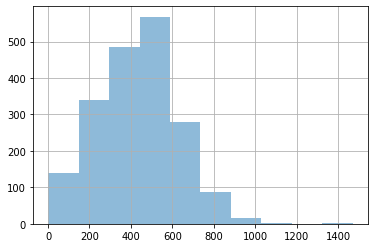

In [126]:
users_final_smart['sum_calls'].hist(alpha=0.5)

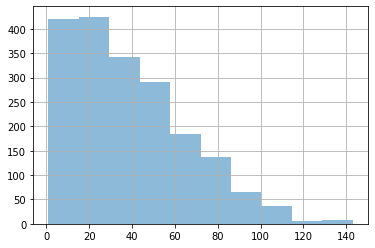

In [127]:
users_final_smart['mes_count'].hist(alpha=0.5)

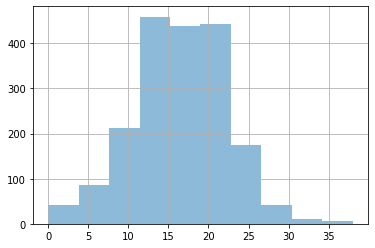

In [128]:
users_final_smart['gb_used'].hist(alpha=0.5)

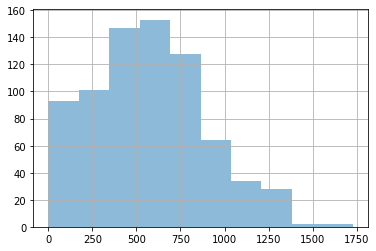

In [123]:
users_final_ultra['sum_calls'].hist(alpha=0.5)

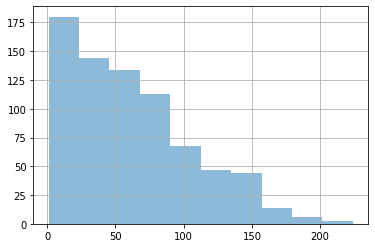

In [124]:
users_final_ultra['mes_count'].hist(alpha=0.5)

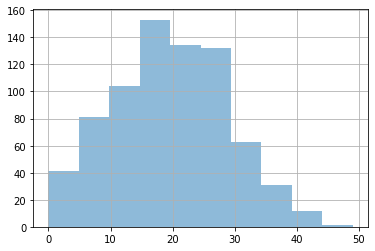

In [125]:
users_final_ultra['gb_used'].hist(alpha=0.5)

Распределения по минутам и интернету близко к нормальному. Распределение по сообщением скошенно вправо. Достаточно логично, Большинство людей сейчас пользуется не смс сообщениями, а программами для общения. Смски уходят в прошлое.

Переходим к последнему этапу, 4.

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.


Начнем с средней выручки пользователей из разных тарифов.

In [143]:
results = st.ttest_ind(
    users_final_smart['rub_per_month'], 
    users_final_ultra['rub_per_month'], equal_var=False)

print('p-значение:', results.pvalue)
alpha = .01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.856151617121516e-199
Отвергаем нулевую гипотезу


Для того, чтобы посмотреть разные города, сначал составим датасет с МСК, и без.

In [133]:
users_final_msk = users_final.query('city == "Москва"')

In [137]:
users_final_others = users_final.query('city == "Другое"')

In [142]:
results = st.ttest_ind(
    users_final_msk['rub_per_month'], 
    users_final_others['rub_per_month'], equal_var=False)

print('p-значение:', results.pvalue)
alpha = .01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13762411595164548
Не получилось отвергнуть нулевую гипотезу


В первом эксперименте H0 - средние двух выборок примерно одинаковые. H1 - средние значимо отличаются. Отвергаем H0, средние значимо отличаются. 

Во втором эксперименте H0 - средние двух выборок примерно одинаковые. H1 - средние значимо отличаются. Гипотизу отвергнуть нельзя. Значит средние примерно одинаковые.

Использовали scipy.stats.ttest_ind так как у нас две генеральных совокупности, и мы сравниваем их среднее. 

<h3>Вывод</h3>

1. Большое количество данных часто не нужно для анализа. Лучше сразу взглянуть на таблицы и определить какие не нужны, чтобы не делать лишнюю работу

2. Необходимо сразу понимать, в каких еденицах нужно считать и куда округлять. Данные даются в мб, а платятся за гб. Конвертируем в нужные единицы и используем их.

3. Не нужно бояться делать большие таблицы в процессе работы. Главное, чтобы выводы были сделаны понятными для конечного пользователя.

4. Статистика это помощник, а не основной инструмент. Многие выводы можно сделать и без использования статистики. Статистику необходимо использовать для проверок гипотез и правильности выводов. 